# CubeSmart Case Study

-Shubham Kokane

## Problem Statment:

In this case study, you need to use the direct marketing campaigns data of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the client. The goal is to predict if the client will subscribe to a term product (variable Y).

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing


## Reading the data from csv to a DataFrame

In [2]:
df = pd.read_csv("Case Study Data.csv")
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no
5,45.0,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59.0,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41.0,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24.0,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25.0,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## EDA

In [3]:
#Shape of the Data
df.shape

(41188, 21)

In [4]:
# To check the datatypes and Non NA values in each columnn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37444 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  36040 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
#Summary statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37444.0,39.999947,10.414908,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,36040.0,93.575575,0.579216,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [6]:
# Number of missing values
df.isnull().sum()

age               3744
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx    5148
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [7]:
#Number of unique values in the dataset to identify how to approach one hot encoding
df.apply(lambda x:len(x.unique()))

age                 79
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      27
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

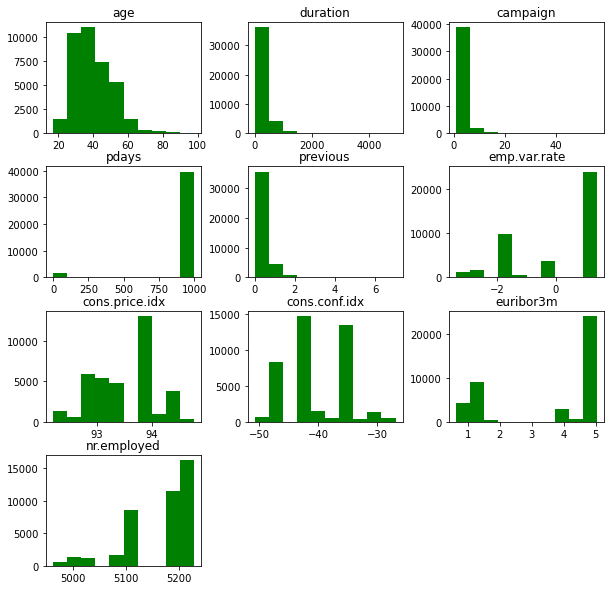

In [8]:
#Plotting numeric columns to check if they are normally distributed
df.hist(figsize=(10,10),color="green",grid=False)
plt.show()

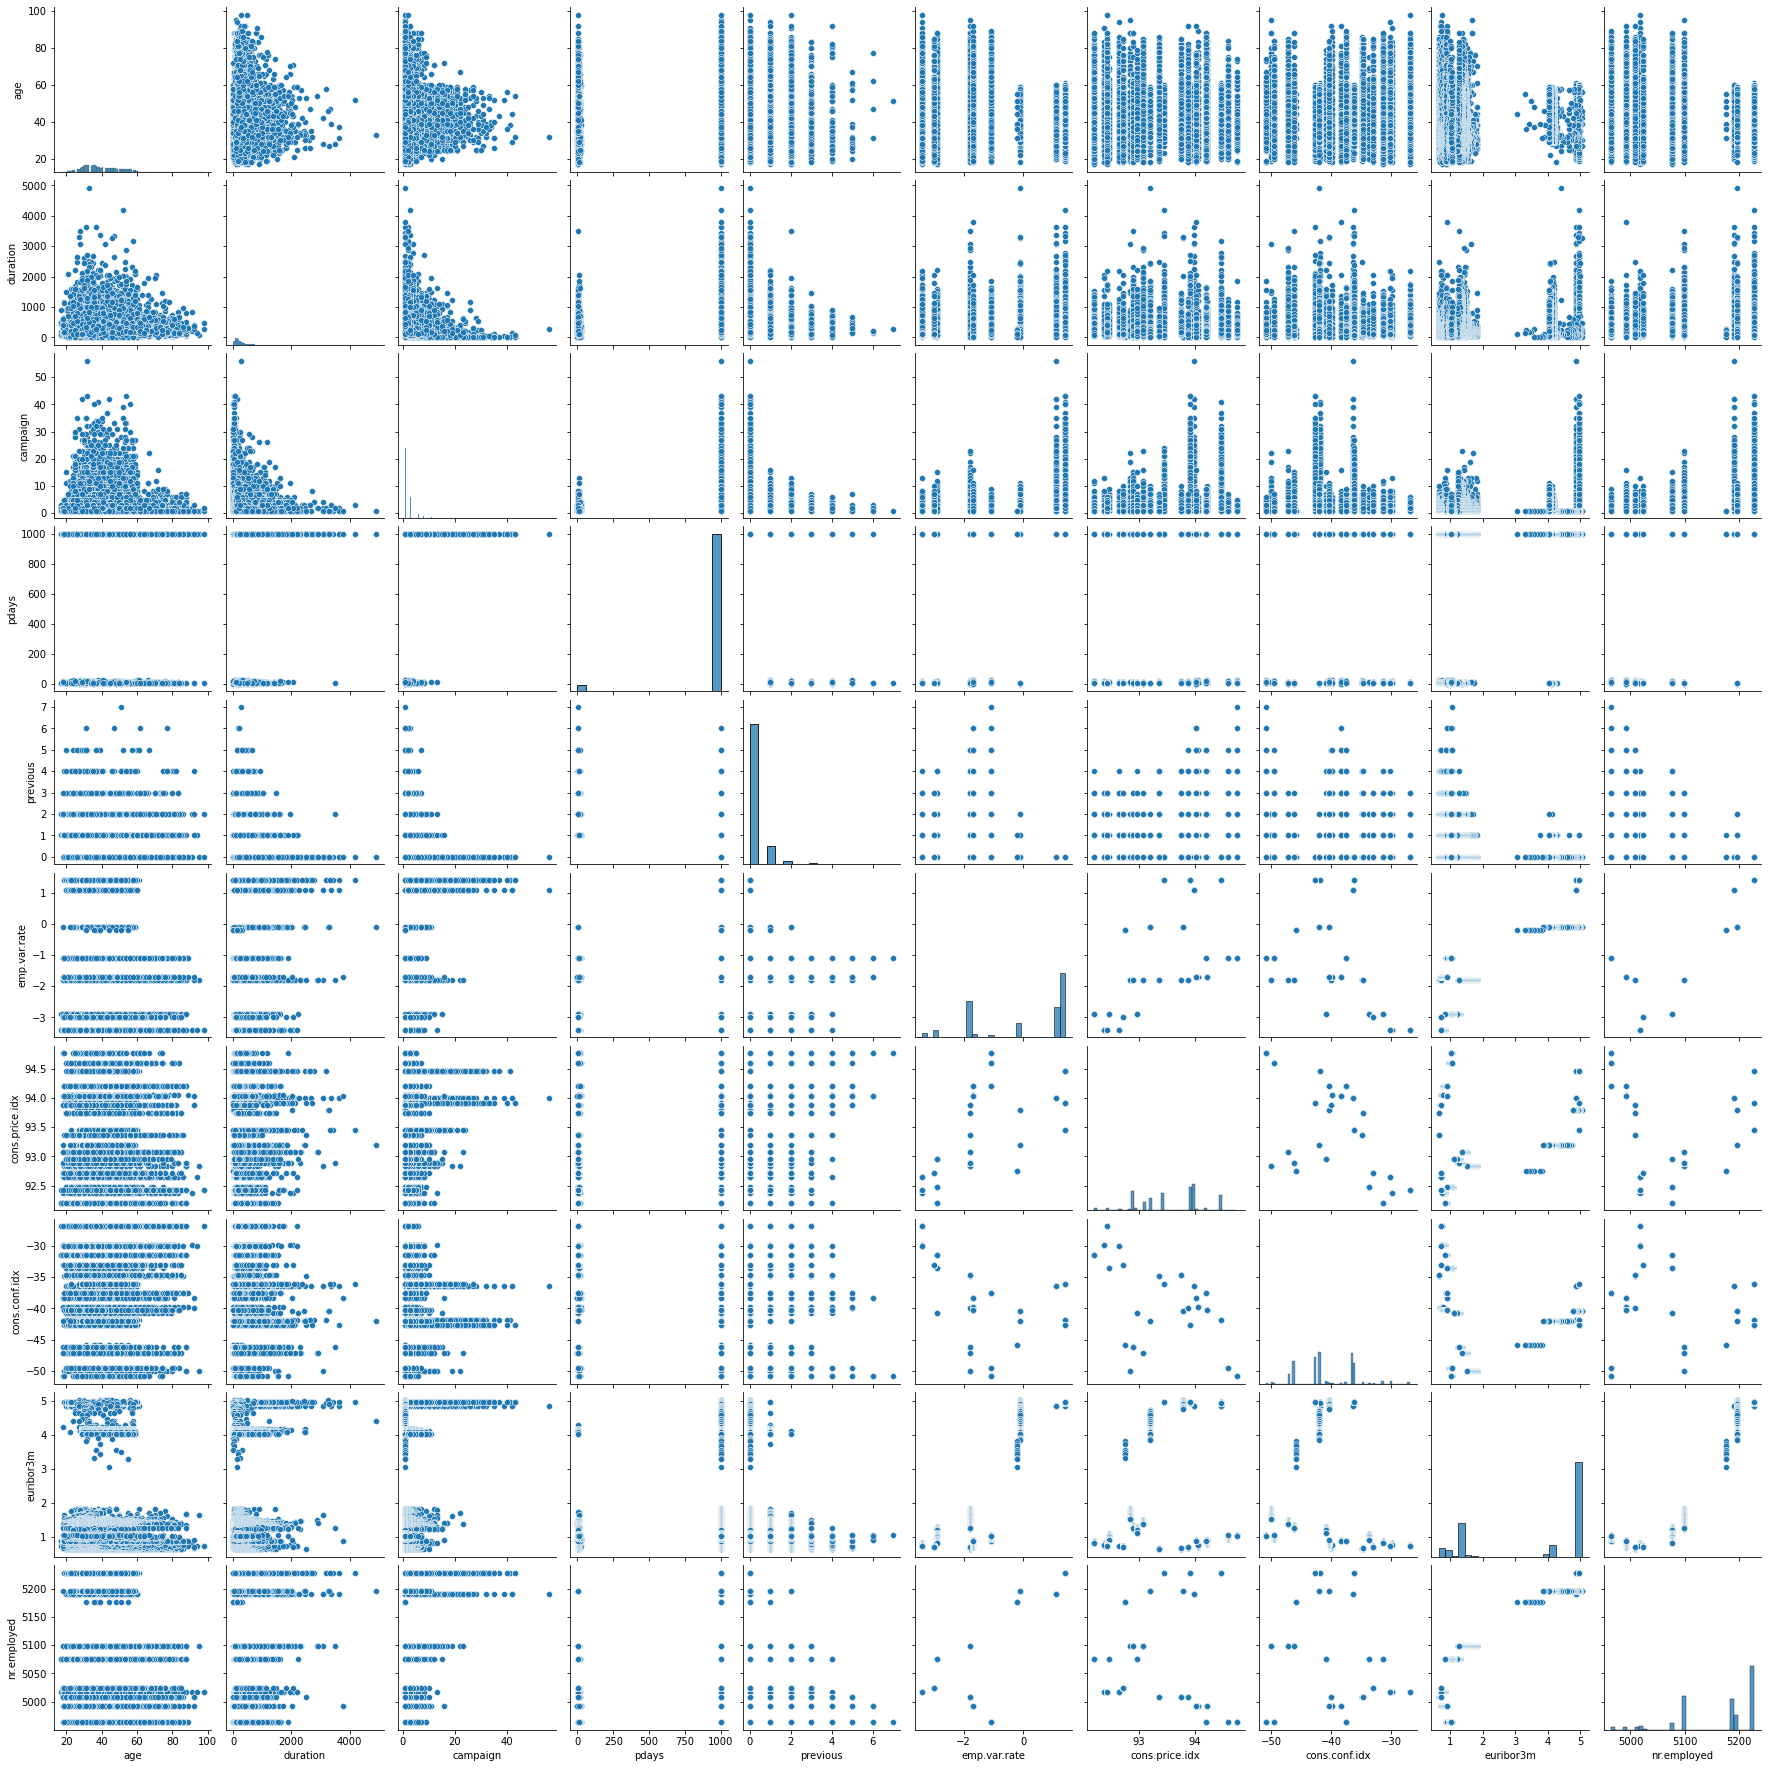

In [9]:
sns.pairplot(df)

Text(0.5, 1.0, 'Age Distribution')

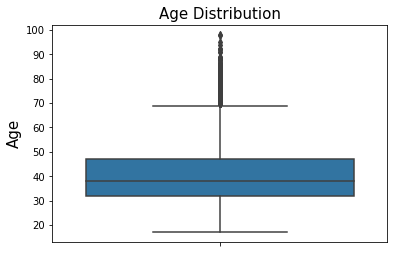

In [10]:
sns.boxplot(y='age', data = df, orient = 'v')
plt.ylabel("Age", fontsize=15)
plt.title('Age Distribution', fontsize=15)

/Users/shubh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age vs Ocucurence')

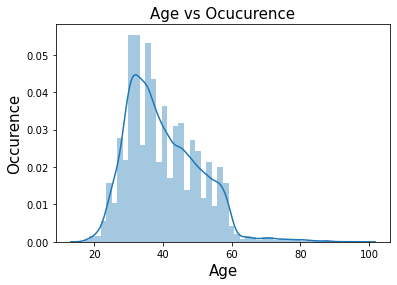

In [11]:
sns.distplot(df['age'])
plt.xlabel("Age", fontsize=15)
plt.ylabel('Occurence', fontsize=15)
plt.title('Age vs Ocucurence', fontsize=15)

Text(0.5, 1.0, 'Job Distribution')

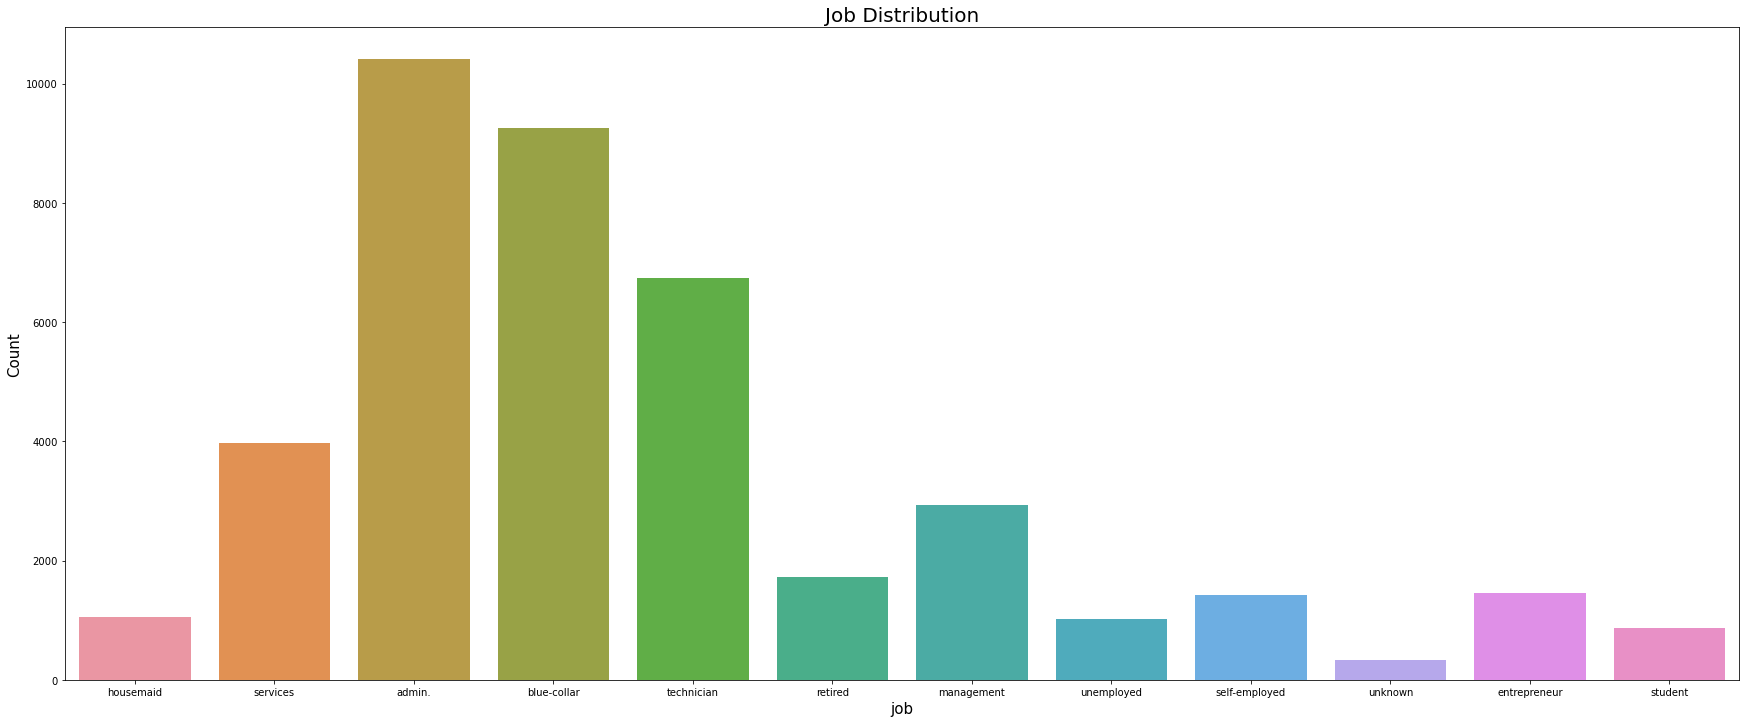

In [12]:
#Job
plt.figure(figsize = (30,12))
sns.countplot(x = 'job',data = df)
plt.xlabel("job", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Job Distribution', fontsize=20)

Text(0.5, 1.0, 'Marital Distribution')

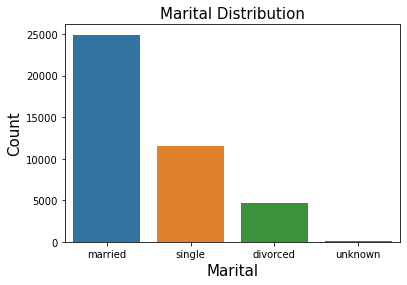

In [13]:
#Marital
sns.countplot(x = 'marital',data = df)
plt.xlabel("Marital", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Marital Distribution', fontsize=15)

<AxesSubplot:xlabel='marital', ylabel='age'>

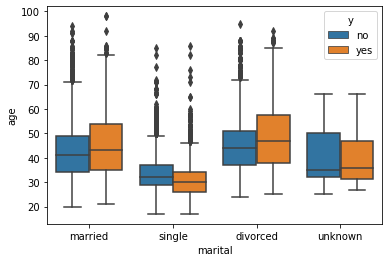

In [14]:
sns.boxplot(x='marital',y='age',hue='y',data=df)

Text(0.5, 1.0, 'Education Distribution')

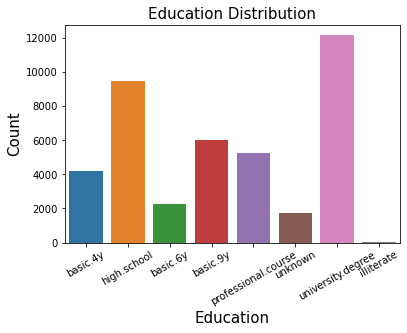

In [15]:
#Education
ax = sns.countplot(x = 'education',data = df)
plt.xticks(rotation = 30)
plt.xlabel("Education", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Education Distribution', fontsize=15)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'basic.4y'),
  Text(1, 0, 'high.school'),
  Text(2, 0, 'basic.6y'),
  Text(3, 0, 'basic.9y'),
  Text(4, 0, 'professional.course'),
  Text(5, 0, 'unknown'),
  Text(6, 0, 'university.degree'),
  Text(7, 0, 'illiterate')])

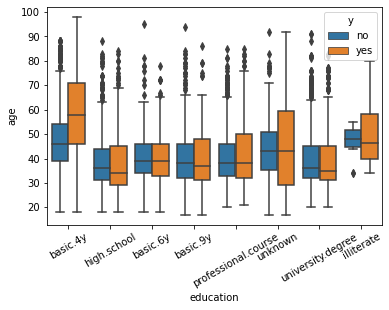

In [16]:
sns.boxplot(x='education',y='age',hue='y',data=df)
plt.xticks(rotation = 30)

Text(0.5, 1.0, 'Default Distribution')

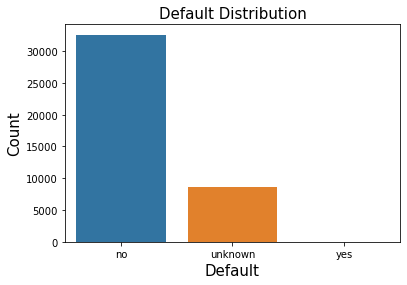

In [17]:
#credit default
sns.countplot(x = 'default',data = df)
plt.xlabel("Default", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Default Distribution', fontsize=15)

<AxesSubplot:xlabel='default', ylabel='age'>

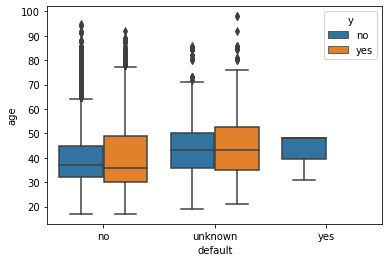

In [18]:
sns.boxplot(x='default',y='age',hue='y',data=df)

Text(0.5, 1.0, 'Housing Distribution')

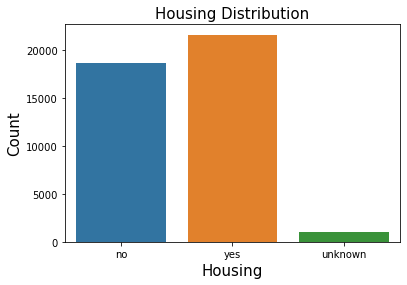

In [19]:
#housing
sns.countplot(x = 'housing',data = df)
plt.xlabel("Housing", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Housing Distribution', fontsize=15)

<AxesSubplot:xlabel='housing', ylabel='age'>

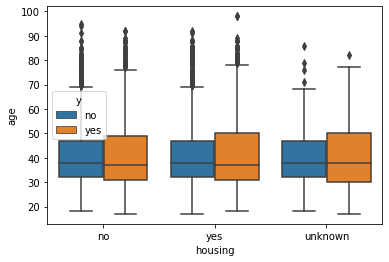

In [20]:
sns.boxplot(x='housing',y='age',hue='y',data=df)


Text(0.5, 1.0, 'Loan Distribution')

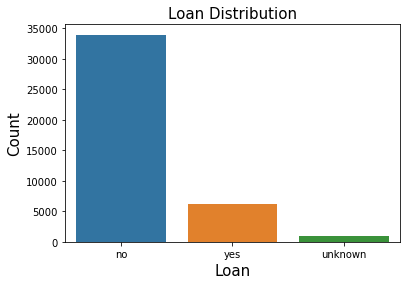

In [21]:
#Loan
sns.countplot(x = 'loan',data = df)
plt.xlabel("Loan", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Loan Distribution', fontsize=15)

<AxesSubplot:xlabel='loan', ylabel='age'>

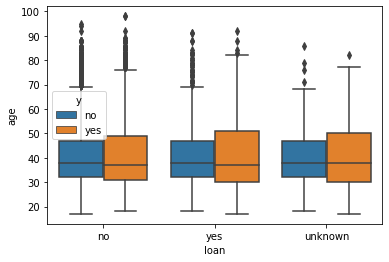

In [22]:
sns.boxplot(x='loan',y='age',hue='y',data=df)


Text(0.5, 1.0, 'Contact Distribution')

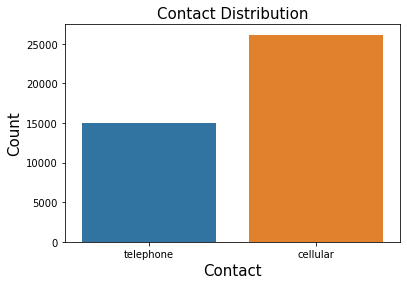

In [23]:
#contact
sns.countplot(x = 'contact',data = df)
plt.xlabel("Contact", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Contact Distribution', fontsize=15)

Text(0.5, 1.0, 'Monthly Distribution')

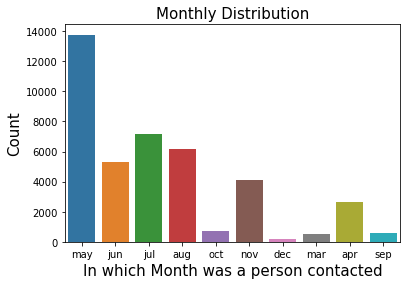

In [24]:
#month
sns.countplot(x = 'month',data = df)
plt.xlabel("In which Month was a person contacted", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Monthly Distribution', fontsize=15)

Text(0.5, 1.0, 'Day Distribution')

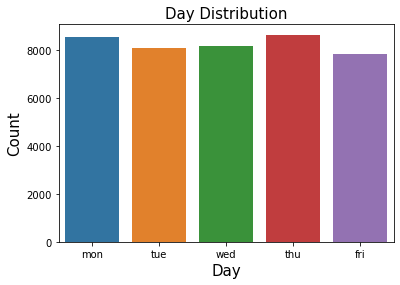

In [25]:
#day
sns.countplot(x = 'day_of_week',data = df)
plt.xlabel("Day", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Day Distribution', fontsize=15)

<AxesSubplot:xlabel='duration'>

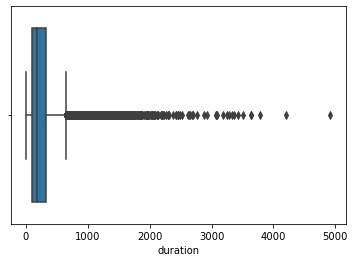

In [26]:
sns.boxplot(x=df["duration"])

/Users/shubh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Duration distribution')

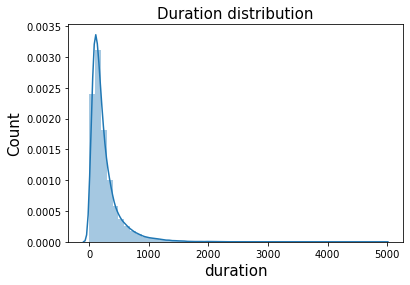

In [27]:
sns.distplot(df['duration'])
plt.xlabel("duration", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Duration distribution', fontsize=15)

In [28]:
df[(df['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,NaN,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no
23031,59.0,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,NaN,-36.1,4.965,5228.1,no
28063,NaN,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31.0,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


Explaination: Here we can see that the duration column is highly affecting the target variable.

## Correlation Matrix

In [29]:
cor=df.corr()
cor

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.000083,0.003844,-0.029472,0.025458,-0.003354,-0.003307,0.128753,0.007957,-0.019165
duration,0.000083,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.006213,-0.008173,-0.032897,-0.044703
campaign,0.003844,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.129056,-0.013733,0.135133,0.144095
pdays,-0.029472,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.079697,-0.091342,0.296899,0.372605
previous,0.025458,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.204180,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.003354,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.776410,0.196041,0.972245,0.906970
cons.price.idx,-0.003307,0.006213,0.129056,0.079697,-0.204180,0.776410,1.000000,0.056928,0.689182,0.523530
cons.conf.idx,0.128753,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.056928,1.000000,0.277686,0.100513
euribor3m,0.007957,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.689182,0.277686,1.000000,0.945154
nr.employed,-0.019165,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.523530,0.100513,0.945154,1.000000


<AxesSubplot:>

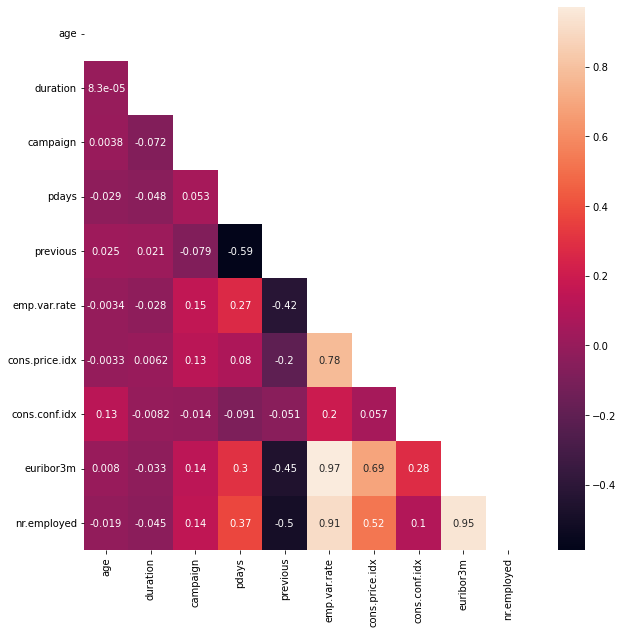

In [30]:
#heatmap
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(df.corr())) 
sns.heatmap(df.corr(),mask=mask,annot=True)

## Conclusion from EDA:

1) The age feature has a lower correlation with the remaining feature values.
<br>2) For Job attribute the count of admin and blue collar is high.
<br>3) Clients who are married, are way more than what are present in other categories.
<br>4) A lot of the clients have housing loans compared to the clients having personal loans
<br>5) Contacted during a particular day of the week is equally distributed among all the days.
<br>6) High number of clients were contacted during the month of May.

## Data preparation - Handling missing values, label encoding

In [31]:
df1 = df[pd.notnull(df['age'])]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37444 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37444 non-null  float64
 1   job             37444 non-null  object 
 2   marital         37444 non-null  object 
 3   education       37444 non-null  object 
 4   default         37444 non-null  object 
 5   housing         37444 non-null  object 
 6   loan            37444 non-null  object 
 7   contact         37444 non-null  object 
 8   month           37444 non-null  object 
 9   day_of_week     37444 non-null  object 
 10  duration        37444 non-null  int64  
 11  campaign        37444 non-null  int64  
 12  pdays           37444 non-null  int64  
 13  previous        37444 non-null  int64  
 14  poutcome        37444 non-null  object 
 15  emp.var.rate    37444 non-null  float64
 16  cons.price.idx  32772 non-null  float64
 17  cons.conf.idx   37444 non-null 

In [32]:
df_avg = df1.groupby(['job', 'marital'])['age'].mean().reset_index()
df_avg

,job,marital,age
0,admin.,divorced,43.263385
1,admin.,married,40.314376
2,admin.,single,33.641273
3,admin.,unknown,35.750000
4,blue-collar,divorced,42.750755
5,blue-collar,married,40.875595
6,blue-collar,single,33.351254
7,blue-collar,unknown,41.846154
8,entrepreneur,divorced,44.447205
9,entrepreneur,married,42.369388


In [33]:
df_null = df[df.isnull()['age']]
df_null

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
22,NaN,retired,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
63,NaN,blue-collar,married,basic.6y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no
77,NaN,services,married,high.school,unknown,yes,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
78,NaN,management,married,unknown,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no
94,NaN,blue-collar,married,basic.6y,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41132,NaN,unemployed,married,basic.9y,no,no,no,cellular,nov,thu,...,2,3,2,success,-1.1,94.767,-50.8,1.041,4963.6,yes
41140,NaN,management,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.040,4963.6,yes
41142,NaN,admin.,divorced,university.degree,no,yes,no,cellular,nov,fri,...,4,999,2,failure,-1.1,NaN,-50.8,1.040,4963.6,yes
41168,NaN,entrepreneur,married,university.degree,no,no,no,cellular,nov,wed,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no


In [34]:
df_merged = pd.merge(df_avg, df_null, how = 'inner', on=['job', 'marital'])
df_merged

,job,marital,age_x,age_y,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,admin.,divorced,43.263385,NaN,university.degree,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,admin.,divorced,43.263385,NaN,university.degree,no,unknown,unknown,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,admin.,divorced,43.263385,NaN,high.school,no,no,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,admin.,divorced,43.263385,NaN,basic.9y,unknown,no,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
4,admin.,divorced,43.263385,NaN,university.degree,no,yes,no,telephone,may,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,unknown,married,48.128571,NaN,professional.course,no,no,no,cellular,oct,...,1,6,1,success,-1.1,94.601,-49.5,1.025,4963.6,no
3740,unknown,single,36.788732,NaN,high.school,unknown,yes,no,cellular,may,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
3741,unknown,single,36.788732,NaN,unknown,no,yes,yes,cellular,may,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.259,5099.1,no
3742,unknown,single,36.788732,NaN,university.degree,no,yes,no,cellular,jun,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes


In [35]:
df_merged = df_merged.drop('age_y', 1)

/var/folders/31/jnhds9w56tbcvfhscjr2jzdc0000gn/T/ipykernel_82237/1945485795.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_merged = df_merged.drop('age_y', 1)


In [36]:
df_merged.rename(columns={'age_x':'age'},inplace=True)
df_merged

,job,marital,age,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,admin.,divorced,43.263385,university.degree,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,admin.,divorced,43.263385,university.degree,no,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,admin.,divorced,43.263385,high.school,no,no,no,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,admin.,divorced,43.263385,basic.9y,unknown,no,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
4,admin.,divorced,43.263385,university.degree,no,yes,no,telephone,may,mon,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,unknown,married,48.128571,professional.course,no,no,no,cellular,oct,thu,...,1,6,1,success,-1.1,94.601,-49.5,1.025,4963.6,no
3740,unknown,single,36.788732,high.school,unknown,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
3741,unknown,single,36.788732,unknown,no,yes,yes,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.259,5099.1,no
3742,unknown,single,36.788732,university.degree,no,yes,no,cellular,jun,tue,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes


In [37]:
df_merged['age'] = df_merged['age'].apply(np.ceil)
df_merged

,job,marital,age,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,admin.,divorced,44.0,university.degree,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,admin.,divorced,44.0,university.degree,no,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,admin.,divorced,44.0,high.school,no,no,no,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,admin.,divorced,44.0,basic.9y,unknown,no,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
4,admin.,divorced,44.0,university.degree,no,yes,no,telephone,may,mon,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,unknown,married,49.0,professional.course,no,no,no,cellular,oct,thu,...,1,6,1,success,-1.1,94.601,-49.5,1.025,4963.6,no
3740,unknown,single,37.0,high.school,unknown,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
3741,unknown,single,37.0,unknown,no,yes,yes,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.259,5099.1,no
3742,unknown,single,37.0,university.degree,no,yes,no,cellular,jun,tue,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes


In [38]:
cols = df_merged.columns.tolist()
cols = [cols[2]] + cols[0:2] + cols[3:]
df_merged[cols]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,44.0,admin.,divorced,university.degree,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,44.0,admin.,divorced,university.degree,no,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,44.0,admin.,divorced,high.school,no,no,no,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,44.0,admin.,divorced,basic.9y,unknown,no,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
4,44.0,admin.,divorced,university.degree,no,yes,no,telephone,may,mon,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,49.0,unknown,married,professional.course,no,no,no,cellular,oct,thu,...,1,6,1,success,-1.1,94.601,-49.5,1.025,4963.6,no
3740,37.0,unknown,single,high.school,unknown,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
3741,37.0,unknown,single,unknown,no,yes,yes,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.259,5099.1,no
3742,37.0,unknown,single,university.degree,no,yes,no,cellular,jun,tue,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes


In [39]:
df_final = pd.concat([df1, df_merged],ignore_index=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  36040 non-null  float64
 17  cons.conf.idx   41188 non-null 

Explaination: I have handled missing values in age by inserting the mean values from the remaining rows where the job and marital status is matching. Instead of inserting the same mean value for all the missing entries. Becuase the age of a retired married client will be way more than a single student. Hence this was it will have the near accurate values for age.

In [40]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

## Label Encoding

In [41]:
#Label Encoding dependent and independent variables
lenc = preprocessing.LabelEncoder()

In [42]:
df_final[cat_cols] = df_final[cat_cols].apply(lambda col: lenc.fit_transform(col))
df_final

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,NaN,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,NaN,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,49.0,11,1,5,0,0,0,0,8,2,...,1,6,1,2,-1.1,94.601,-49.5,1.025,4963.6,0
41184,37.0,11,2,3,1,2,0,0,6,1,...,2,999,0,1,-1.8,92.893,-46.2,1.299,5099.1,0
41185,37.0,11,2,7,0,2,2,0,6,0,...,1,999,0,1,-1.8,92.893,-46.2,1.259,5099.1,0
41186,37.0,11,2,6,0,2,0,0,4,3,...,1,999,0,1,-2.9,92.963,-40.8,1.262,5076.2,1


## Correlation matrix for all the variables 

<AxesSubplot:>

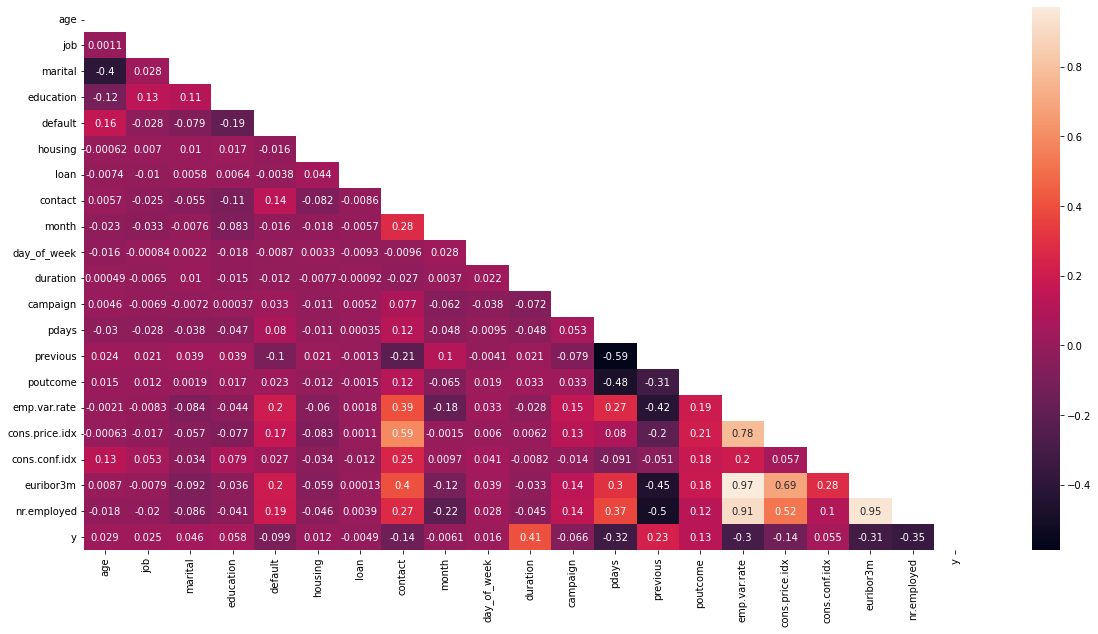

In [43]:
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(df_final.corr())) 
sns.heatmap(df_final.corr(),mask=mask,annot=True)

In [44]:
df_final.drop('cons.price.idx',axis=1, inplace=True)
df_final

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,49.0,11,1,5,0,0,0,0,8,2,235,1,6,1,2,-1.1,-49.5,1.025,4963.6,0
41184,37.0,11,2,3,1,2,0,0,6,1,334,2,999,0,1,-1.8,-46.2,1.299,5099.1,0
41185,37.0,11,2,7,0,2,2,0,6,0,136,1,999,0,1,-1.8,-46.2,1.259,5099.1,0
41186,37.0,11,2,6,0,2,0,0,4,3,728,1,999,0,1,-2.9,-40.8,1.262,5076.2,1


Explaination: The cons.price.idx is not much correlated and has 5148 missing values which constitues of more than 10% of the column data. Hence dropping the column would be the best possible solution.

In [45]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(df_final);

Explaination: Created a function to divide the ages in groups. This will be beneficial becauses there are 79 unqiue values for age. Similar steps have been undertaken below for the remaining numerical values.

In [46]:
df_final['age'] = df_final['age'].astype(int)
df_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,-36.4,4.857,5191.0,0
1,3,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,-36.4,4.857,5191.0,0
2,2,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,-36.4,4.857,5191.0,0
3,2,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,-36.4,4.857,5191.0,0
4,3,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,-36.4,4.857,5191.0,0


In [47]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(df_final);

In [48]:
df_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,3,1,999,0,1,1.1,-36.4,4.857,5191.0,0
1,3,7,1,3,1,0,0,1,6,1,2,1,999,0,1,1.1,-36.4,4.857,5191.0,0
2,2,7,1,3,0,2,0,1,6,1,3,1,999,0,1,1.1,-36.4,4.857,5191.0,0
3,2,0,1,1,0,0,0,1,6,1,2,1,999,0,1,1.1,-36.4,4.857,5191.0,0
4,3,7,1,3,0,0,2,1,6,1,3,1,999,0,1,1.1,-36.4,4.857,5191.0,0


In [49]:
df_final.loc[(df_final['pdays'] == 999), 'pdays'] = 1
df_final.loc[(df_final['pdays'] > 0) & (df_final['pdays'] <= 10), 'pdays'] = 2
df_final.loc[(df_final['pdays'] > 10) & (df_final['pdays'] <= 20), 'pdays'] = 3
df_final.loc[(df_final['pdays'] > 20) & (df_final['pdays'] != 999), 'pdays'] = 4 
df_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,3,1,2,0,1,1.1,-36.4,4.857,5191.0,0
1,3,7,1,3,1,0,0,1,6,1,2,1,2,0,1,1.1,-36.4,4.857,5191.0,0
2,2,7,1,3,0,2,0,1,6,1,3,1,2,0,1,1.1,-36.4,4.857,5191.0,0
3,2,0,1,1,0,0,0,1,6,1,2,1,2,0,1,1.1,-36.4,4.857,5191.0,0
4,3,7,1,3,0,0,2,1,6,1,3,1,2,0,1,1.1,-36.4,4.857,5191.0,0


## Training and Testing classification algorithms

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn import metrics


In [51]:
#Data Splitting
array = df_final.values
X = array[:,:-1]
Y = array[:,-1]

In [52]:
print(X.shape, Y.shape)

(41188, 19) (41188,)


In [53]:
test_size = 0.20
seed = 15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [54]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(32950, 19) (32950,)
(8238, 19) (8238,)


## Logistic Regression

In [55]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)

/Users/shubh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Accuracy and Confusion Matrix

In [56]:
LR = metrics.accuracy_score(Y_test, Y_predict)
LR_p = metrics.precision_score(Y_test, Y_predict)
print("Accuracy_LR:", LR)
print("Precision_LR", LR_p)

Accuracy_LR: 0.906409322651129
Precision_LR 0.6238185255198487


In [57]:
print('confusion_matrix_LR:')
print(metrics.confusion_matrix(Y_test, Y_predict))

confusion_matrix_LR:
[[7137  199]
 [ 572  330]]


## K-Nearest Neighbours

In [58]:
mylist = list(range(1,30))
neighbors = list(filter(lambda x: x % 2 != 0, mylist))
ac_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    # predict the response
    Y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(Y_test, Y_pred)
    ac_scores.append(scores)

In [59]:
MSE = [1 - x for x in ac_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 27


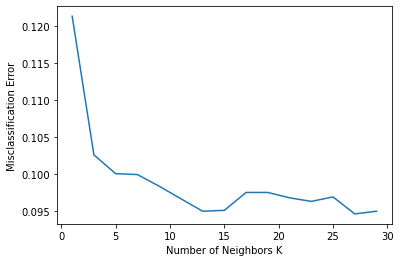

In [60]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [61]:
#using optimal k
knn = KNeighborsClassifier(n_neighbors = optimal_k)

In [62]:
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

### Accuracy and Confusion Matrix

In [63]:
KNN=metrics.accuracy_score(Y_test, Y_pred)
KNN_p = metrics.precision_score(Y_test, Y_pred)
print('Accuracy_KNN:', KNN)
print("Precision_KNN:", KNN_p)

Accuracy_KNN: 0.9054382131585337
Precision_KNN: 0.6467780429594272


In [64]:
print('confusion_matrix_KNN:')
print(metrics.confusion_matrix(Y_test, Y_predict))

confusion_matrix_KNN:
[[7137  199]
 [ 572  330]]


## Random Forest

In [65]:
rnd = RandomForestClassifier()
rnd.fit(X_train, Y_train)
Y_predict = rnd.predict(X_test)

### Accuracy and Confusion Matrix 

In [66]:
RF = metrics.accuracy_score(Y_test, Y_predict)
RF_p = metrics.precision_score(Y_test, Y_pred)
print("Accuracy_RF:", RF)
print("Precision_RF:", RF_p)

Accuracy_RF: 0.9092012624423403
Precision_RF: 0.6467780429594272


In [67]:
print('confusion_matrix_RF:')
print(metrics.confusion_matrix(Y_test, Y_predict))

confusion_matrix_RF:
[[7064  272]
 [ 476  426]]


## Comparing performance of all the models

[]

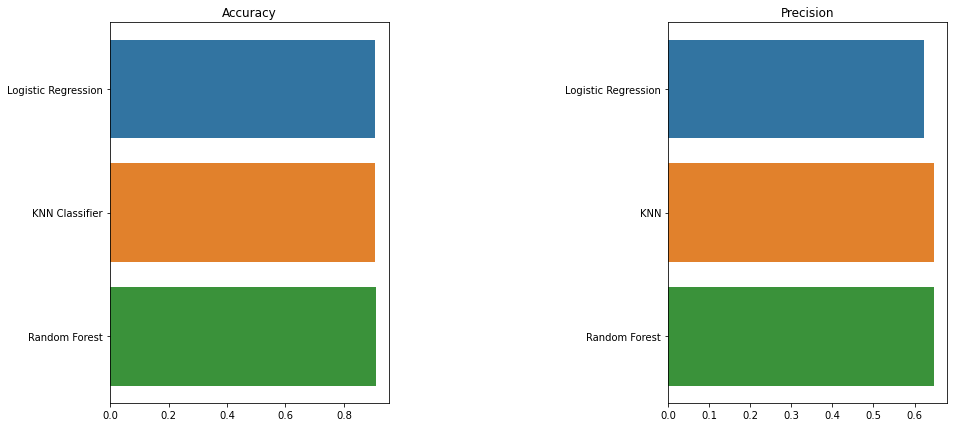

In [68]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.barplot(x = [LR, KNN, RF], y = ['Logistic Regression', 'KNN Classifier', 'Random Forest'])
plt.title("Accuracy")
plt.plot()

plt.subplots_adjust(wspace=1)
plt.subplot(1,2,2)
sns.barplot(x = [LR_p, KNN_p, RF_p], y = ['Logistic Regression', 'KNN', 'Random Forest'])
plt.title("Precision")
plt.plot()

In [69]:
models = pd.DataFrame({'Models':['Logistic Regression', 'KNN Classifier', 'Random Forest'], 'Accuracy': [LR, KNN, RF], 'Precision': [LR_p, KNN_p, RF_p]})
models = models.sort_values(by='Accuracy', ascending=False)
models.reset_index(drop=True, inplace=True)
models

,Models,Accuracy,Precision
0,Random Forest,0.909201,0.646778
1,Logistic Regression,0.906409,0.623819
2,KNN Classifier,0.905438,0.646778


## Conclusions:

1) The goal is to predict if the client will subscribe to the term deposit ('y') is the target varaiable.
<br>2) The bank wants to know if their client will subscribe to the term deposit, hence they need to know the correlation between the variables in the dataset.
<br>3) Looking at three models I used, Random Forest seems to have the best attributes suited for this dataset.
<br>4) But all the models are producing near similar accuracies for the dataset.


## Future Scope

1) If the bank could provide the location and the bank transaction summary details for their clients or if they have access to the income statements of the clients, it would improve the accuracy of the prediction models.
<br>2) Clients residing in metropolitan areas(more developed areas) tend to be more accepting to newer investment opportunities.
<br>3) People having more income or higher amounts of transactions during the monthly cycle would be more accepting to newer investment opportunities. Hence this will improve the accuracy of the dataset. It could also be other way around, clients earning very high income will be least interested in low profit term deposits, hence the amount to be invested in the term deposit is also an important factor. So, the income of clients can bring up alot of newer insights.
<br>4) Based on my ananlysis, the bank will be able to identify which factors are greatly contributing towards a positive response from the client. Which time is more appropriate to contact the clients and what is sweet spot in duration time to contact the clients so that you don't go overboard and contact them for a long time so they bored.

## Improvements in code

1) The accuracies are good, but instead of just label encoding, if I had One Hot Encoded the data it would have given better predicition accuracies, and by better I mean more accurate.
<br>2) The data could be have been wrangled better to gain more insights from the data. But since I had a short amount of time to work on the dataset I was able to bring out limited insights.